In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import psi4
import v3d

In [2]:
#originally intended to use psi4 to compute energies, setting output file and some basic variables. 
psi4.core.set_output_file('tors.dat')
theory = 'mp2/6-31G*'
rad2deg = 180.0/np.pi

In [3]:
#optimized coordinates of the molecule from a previous calc
azi = """
0 1
    C           -1.372186183321    -2.010860020902    -0.886820192828
    C           -0.173158673000    -1.298344357907    -0.406115006426
    N            0.786309071860    -1.384810968974     0.420697487368
    C            0.662837700048    -0.111043752576    -0.491918176988
    H            1.422532833369    -0.002132476819    -1.261568419806
    C            0.271415655367     1.154529325936     0.168585840901
    O           -0.638034693748     0.950769479245     1.162558403008
    O            0.686902544636     2.258017066085    -0.144478115352
    H           -1.457401352716    -2.978238526949    -0.387585199421
    H           -1.313874303487    -2.157164437091    -1.968871402470
    H           -2.260422649854    -1.409349289546    -0.673788389312
    H           -0.815494634684     1.839688017493     1.533442847642
"""


In [4]:
#what coordinates are we optimizing
coords = [
   (1,  2,  4,  6),
   (1,  2,  4,  3),
   (3,  2,  4,  6),
   (8,  6,  4,  2),
   (8,  6,  4,  3),
   (7,  6,  4,  2),
   (7,  6,  4,  3),
   (6,  4,  3,  2)
]

opt_coords = np.zeros(len(coords))
#print the optimized values of these coordinates:
#also, save these values for later
azi_geo = psi4.geometry(azi)
for item, quad in enumerate(coords):
    opt_coords[item] = v3d.tors((azi_geo.to_arrays()[0])[quad[0]-1],
                                (azi_geo.to_arrays()[0])[quad[1]-1],
                                (azi_geo.to_arrays()[0])[quad[2]-1],
                                (azi_geo.to_arrays()[0])[quad[3]-1])*rad2deg
    print(coords[item], opt_coords[item])

opt_energy = -359.534737982901 #psi4.energy(theory)
print(opt_energy)

(1, 2, 4, 6) 78.21623192375759
(1, 2, 4, 3) 178.5630725931619
(3, 2, 4, 6) -100.3468406694048
(8, 6, 4, 2) -158.45180735688515
(8, 6, 4, 3) 144.53796306708819
(7, 6, 4, 2) 20.319223422196984
(7, 6, 4, 3) -36.69100615382969
(6, 4, 3, 2) 109.32378533640231
-359.534737982901


In [5]:
#performed scan using Q-Chem

data = [ #list of arrays of energy data
    #torsion 1
np.array(
[[160.0000,      -359.512292611064],
 [150.0000,      -359.517214028386],
 [140.0000,      -359.521854223337],
 [130.0000,      -359.525813585212],
 [120.0000,      -359.529023928270],
 [110.0000,      -359.531489715614],
 [100.0000,      -359.533237890716],
 [ 90.0000,      -359.534304118882],
 [ 80.0000,      -359.534722396726],
 [ 70.0000,      -359.534527038372],
 [ 60.0000,      -359.533702510884],
 [ 50.0000,      -359.532245581045],
 [ 40.0000,      -359.530147304758],
 [ 30.0000,      -359.527414697117],
 [ 20.0000,      -359.524098542107],
 [ 10.0000,      -359.520284654635],
 [  0.0000,      -359.516159300073],
 [-10.0000,      -359.512184282246]]),
        #torsion 2
np.array(
[[  180.0000,      -359.534730803401],
 [  170.0000,      -359.534468025152],
 [  160.0000,      -359.533479205174],
 [  150.0000,      -359.531721429097],
 [  140.0000,      -359.529176980422],
 [  130.0000,      -359.525869677108],
 [  120.0000,      -359.521896646056],
 [  110.0000,      -359.517494931251],
 [  100.0000,      -359.513222064056],
 [   90.0000,      -359.510550710632],
 [ -100.0000,      -359.512695638496],
 [ -110.0000,      -359.516789030350],
 [ -120.0000,      -359.521137806084],
 [ -130.0000,      -359.525129320352],
 [ -140.0000,      -359.528505571905],
 [ -150.0000,      -359.531169711533],
 [ -160.0000,      -359.533089955949],
 [ -170.0000,      -359.534266797984],
 [ -180.0000,      -359.534730803401]]),
            #torsion 3
np.array(
[[  -160.0000,      -359.476121867601],
 [  -150.0000,      -359.493999809471],
 [  -140.0000,      -359.508843698742],
 [  -130.0000,      -359.520400378336],
 [  -120.0000,      -359.528553161131],
 [  -110.0000,      -359.533287282538],
 [  -100.0000,      -359.534734595100],
 [   -90.0000,      -359.533225665309],
 [   -80.0000,      -359.529245769770],
 [   -70.0000,      -359.523306754178],
 [   -60.0000,      -359.515851031585],
 [   -50.0000,      -359.507206129774],
 [   -40.0000,      -359.497585094488],
 [   -30.0000,      -359.487125619566],
 [   -20.0000,      -359.475953206575],
 [   -10.0000,      -359.464254385033],
 [     0.0000,      -359.452422818487]]),
    #torsion 4
np.array(
[[-160.0000,      -359.5347316552],
 [-150.0000,      -359.5345601921],
 [-140.0000,      -359.5338884778],
 [-130.0000,      -359.5327442928],
 [-120.0000,      -359.5312047933],
 [-110.0000,      -359.5294092796],
 [-100.0000,      -359.5275710252],
 [ -90.0000,      -359.5259746754],
 [ -80.0000,      -359.5249214746],
 [ -70.0000,      -359.5246221804],
 [ -60.0000,      -359.5251114363],
 [ -50.0000,      -359.5262659477],
 [ -40.0000,      -359.5278823313],
 [ -30.0000,      -359.5297326576],
 [ -20.0000,      -359.5315833859],
 [ -10.0000,      -359.5332147899],
 [   0.0000,      -359.5344538693],
 [  10.0000,      -359.5351953333],
 [  20.0000,      -359.5353993659],
 [  30.0000,      -359.5350716381],
 [  40.0000,      -359.5342451150],
 [  50.0000,      -359.5329776759],
 [  60.0000,      -359.5313643012],
 [  70.0000,      -359.5295458094],
 [  80.0000,      -359.5277035861],
 [  90.0000,      -359.5260474036],
 [ 100.0000,      -359.5248141137],
 [ 110.0000,      -359.5242638262],
 [ 120.0000,      -359.5245884185],
 [ 130.0000,      -359.5257205490],
 [ 140.0000,      -359.5273606957],
 [ 150.0000,      -359.5291812350],
 [ 160.0000,      -359.5309326552]]),
        #torsion 5
np.array(
[[  160.0000,      -359.5341043246],
 [  150.0000,      -359.5346585801],
 [  140.0000,      -359.5346829671],
 [  130.0000,      -359.5341910359],
 [  120.0000,      -359.5332270017],
 [  110.0000,      -359.5318641092],
 [  100.0000,      -359.5302079413],
 [   90.0000,      -359.5284098327],
 [   80.0000,      -359.5266731563],
 [   70.0000,      -359.5252485515],
 [   60.0000,      -359.5244007683],
 [   50.0000,      -359.5243242877],
 [   40.0000,      -359.5250453170],
 [   30.0000,      -359.5264142208],
 [   20.0000,      -359.5281928221],
 [   10.0000,      -359.5301229681],
 [    0.0000,      -359.5319625330],
 [  -10.0000,      -359.5335158285],
 [  -20.0000,      -359.5346477379],
 [  -30.0000,      -359.5352796356],
 [  -40.0000,      -359.5353706475],
 [  -50.0000,      -359.5349082446],
 [  -60.0000,      -359.5339201392],
 [  -70.0000,      -359.5324962243],
 [  -80.0000,      -359.5307864785],
 [  -90.0000,      -359.5289818772],
 [ -100.0000,      -359.5272788981],
 [ -110.0000,      -359.5258653914],
 [ -120.0000,      -359.5249217085],
 [ -130.0000,      -359.5246187495],
 [ -140.0000,      -359.5250694234],
 [ -150.0000,      -359.5262375004],
 [ -160.0000,      -359.5279066772]]),
            #torsion 6
np.array(
[[  160.0000,      -359.5316996824],
 [  150.0000,      -359.5298811997],
 [  140.0000,      -359.5279961606],
 [  130.0000,      -359.5262986441],
 [  120.0000,      -359.5250882257],
 [  110.0000,      -359.5246181276],
 [  100.0000,      -359.5249593583],
 [   90.0000,      -359.5259835946],
 [   80.0000,      -359.5274705930],
 [   70.0000,      -359.5291868602],
 [   60.0000,      -359.5309170984],
 [   50.0000,      -359.5324737143],
 [   40.0000,      -359.5337015178],
 [   30.0000,      -359.5344808247],
 [   20.0000,      -359.5347364683],
 [   10.0000,      -359.5344475877],
 [    0.0000,      -359.5336450500],
 [  -10.0000,      -359.5323959063],
 [  -20.0000,      -359.5307968942],
 [  -30.0000,      -359.5289873814],
 [  -40.0000,      -359.5271692548],
 [  -50.0000,      -359.5256028986],
 [  -60.0000,      -359.5245631949],
 [  -70.0000,      -359.5242639892],
 [  -80.0000,      -359.5247787001],
 [  -90.0000,      -359.5260092999],
 [ -100.0000,      -359.5277294164],
 [ -110.0000,      -359.5296582938],
 [ -120.0000,      -359.5315324811],
 [ -130.0000,      -359.5331480157],
 [ -140.0000,      -359.5343727546],
 [ -150.0000,      -359.5351348951],
 [ -160.0000,      -359.5354029717]]),
            #torsion 7
np.array(
[[  160.0000,      -359.5282918563],
 [  150.0000,      -359.5264276903],
 [  140.0000,      -359.5250212257],
 [  130.0000,      -359.5243158625],
 [  120.0000,      -359.5244005256],
 [  110.0000,      -359.5252077763],
 [  100.0000,      -359.5265695551],
 [   90.0000,      -359.5282699344],
 [   80.0000,      -359.5300821599],
 [   70.0000,      -359.5317925221],
 [   60.0000,      -359.5332197010],
 [   50.0000,      -359.5342229095],
 [   40.0000,      -359.5347027885],
 [   30.0000,      -359.5346057251],
 [   20.0000,      -359.5339386983],
 [   10.0000,      -359.5327742631],
 [    0.0000,      -359.5312387867],
 [  -10.0000,      -359.5294955516],
 [  -20.0000,      -359.5277395967],
 [  -30.0000,      -359.5261940073],
 [  -40.0000,      -359.5250900830],
 [  -50.0000,      -359.5246231242],
 [  -60.0000,      -359.5248884316],
 [  -70.0000,      -359.5258386189],
 [  -80.0000,      -359.5273041131],
 [  -90.0000,      -359.5290588397],
 [ -100.0000,      -359.5308746380],
 [ -110.0000,      -359.5325484644],
 [ -120.0000,      -359.5339200733],
 [ -130.0000,      -359.5348774628],
 [ -140.0000,      -359.5353544209],
 [ -150.0000,      -359.5353181510],
 [ -160.0000,      -359.5347586171]]),
                #torsion 8
np.array(
[[  160.0000,      -359.488220945654],
 [  150.0000,      -359.504153156748],
 [  140.0000,      -359.517186213552],
 [  130.0000,      -359.526768386425],
 [  120.0000,      -359.532635184587],
 [  110.0000,      -359.534729507545],
 [  100.0000,      -359.533203152837],
 [   90.0000,      -359.528462984663],
 [   80.0000,      -359.521143082668],
 [   70.0000,      -359.511947327023],
 [   60.0000,      -359.501484971955],
 [   50.0000,      -359.490194896892],
 [   40.0000,      -359.478353919625],
 [   30.0000,      -359.466122044910],
 [   20.0000,      -359.453638533635],
 [   10.0000,      -359.441641056336]]),
]

for i in range(len(coords)):
    data[i][:, 1] -= opt_energy
    data[i][:, 1] *= 627.503

Text(0.5, 0, 'Torsion Angle (degree)')

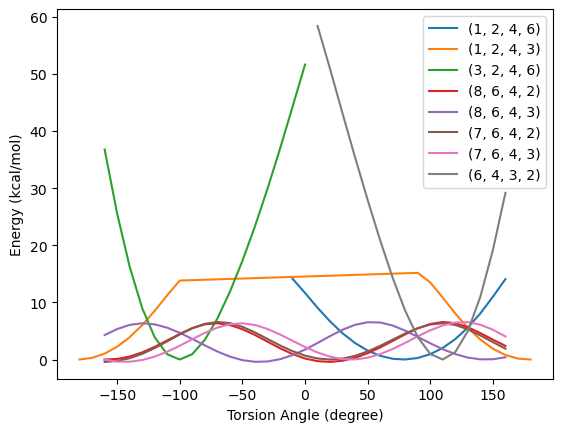

In [6]:
for i in range(len(coords)):
    plt.plot(data[i][:, 0], 
             data[i][:, 1],
            label=str(coords[i]))
plt.legend()
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')


Text(0.5, 0, 'Torsion Angle (degree)')

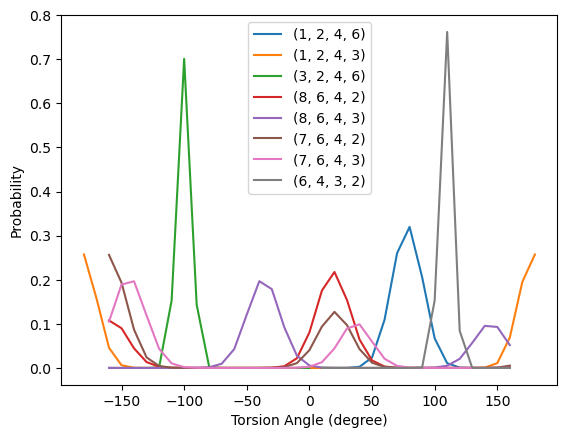

In [7]:
for i in range(len(coords)):
    plt.plot(data[i][:, 0], 
             np.exp(-data[i][:, 1]/(0.0019872041*300))/(np.sum(np.exp(-data[i][:, 1]/(0.0019872041*300)))),
            label=str(coords[i])) # 0.001985877 kcal K-1 mol-1 for ideal gas constant
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Torsion Angle (degree)')

In [8]:
def vdihed(x, n, k, d):
    """
    function for each dihedral
    """
    return k*(1+np.cos(n*x*np.pi/180 - d*np.pi/180))

colors = ['tab:blue', 
          'tab:orange', 
          'tab:green', 
          'tab:red', 
          'tab:purple',
          'tab:brown',
          'tab:pink',
          'tab:gray',
          'tab:olive',
          'tab:cyan']
    

In [9]:
print(data[0][:,0])

[160. 150. 140. 130. 120. 110. 100.  90.  80.  70.  60.  50.  40.  30.
  20.  10.   0. -10.]


For the torsion angle between atoms  (1, 2, 4, 6)
the n=1 force constant is  15.112253110885119 ± 0.15364488085351136 kcal/mol
and the phase shift is  -103.31486112656454 ± 0.391369381441037 degrees


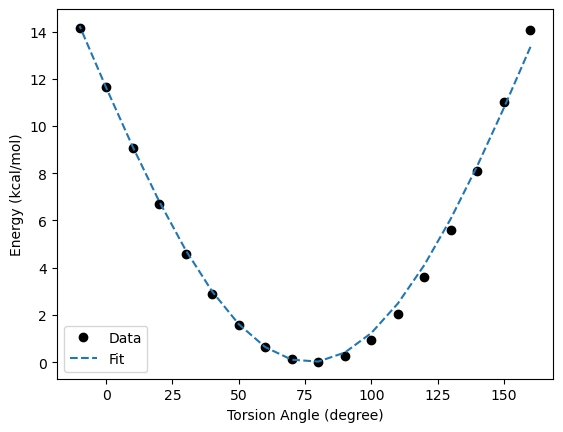

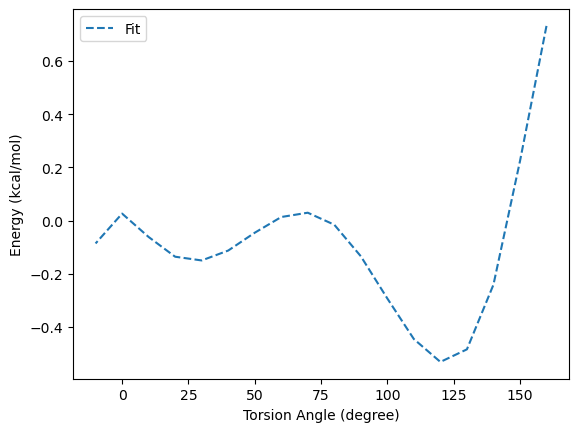

In [10]:
# fitting dihedral 1, (1, 2, 4, 6)

dinum = 1

def sum_vdihed(x, k1, d1):
    """function for all dihedrals at once"""
    ks = np.array([k1])
    ds = np.array([d1])
    
    vdiheds = np.zeros((1, len(x)))
    
    for i, n in enumerate([1]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1] 
                      )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=1 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

    
plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1]-sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

For the torsion angle between atoms  (1, 2, 4, 3)
the n=1 force constant is  16.299434499732307 ± 0.12555877159515116 kcal/mol
and the phase shift is  -1.2411047506719837 ± 0.2979605138469906 degrees


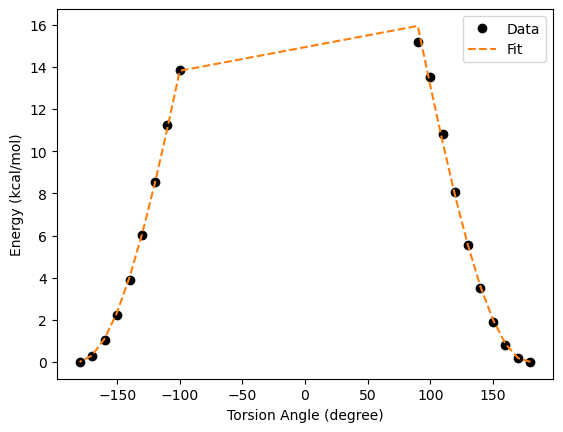

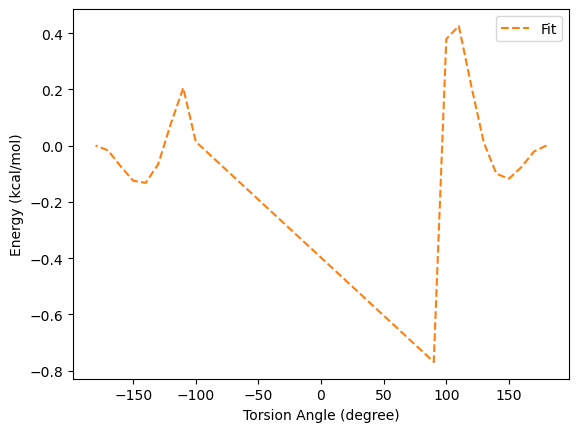

In [11]:
# fitting dihedral 2, (1, 2, 4, 3)

dinum = 2

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1]
                      )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=1 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

    
plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1]-sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

For the torsion angle between atoms  (3, 2, 4, 6)
the n=1 force constant is  49.48135422225344 ± 1.1747581969257872 kcal/mol
and the phase shift is  87.12094872433735 ± 0.5875173687307932 degrees
the n=3 force constant is  2.1826915787576664 ± 0.3125621597419391 kcal/mol
and the phase shift is  -159.11827415720143 ± 15.368881206153311 degrees


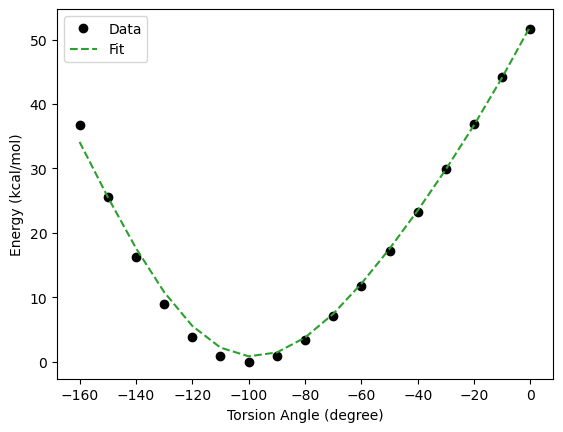

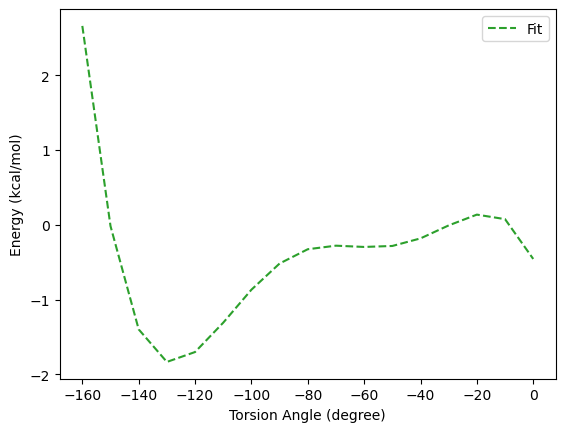

In [12]:
# fitting dihedral 3, (3,  2,  4,  6)

dinum = 3

def sum_vdihed(x, k1, d1, k2, d2):
    """function for all dihedrals at once"""
    ks = np.array([k1, k2])
    ds = np.array([d1, d2])
    
    vdiheds = np.zeros((2, len(x)))
    
    for i, n in enumerate([1, 3]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],
                      bounds=([0, -180, 0, -180],
                              [np.inf, 180, np.inf, 180])#, 
                      #p0=p0[i]
                     )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=1 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')
print('the n=3 force constant is ', str(parms[0][2]), '\u00B1', np.sqrt(np.diag(parms[1]))[2], 'kcal/mol')
print('and the phase shift is ', str(parms[0][3]), '\u00B1', np.sqrt(np.diag(parms[1]))[3], 'degrees')

    
plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()


plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1]-sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

For the torsion angle between atoms  (8, 6, 4, 2)
the n=2 force constant is  3.0549224239155355 ± 0.04520745114920402 kcal/mol
and the phase shift is  -139.75409458558335 ± 1.519804531104733 degrees


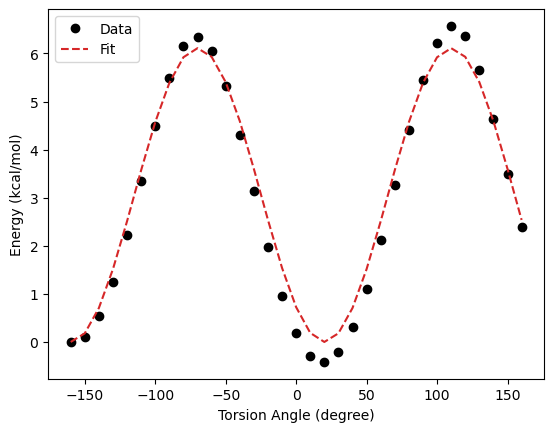

In [13]:
# fitting dihedral 4, (8,  6,  4,  2)

dinum = 4

def sum_vdihed(x, k1, d1):
    """function for all dihedrals at once"""
    ks = np.array([k1])
    ds = np.array([d1])
    
    vdiheds = np.zeros((1, len(x)))
    
    for i, n in enumerate([2]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],
                      )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=2 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()


For the torsion angle between atoms  (8, 6, 4, 3)
the n=2 force constant is  3.098820549975448 ± 0.04128031416994147 kcal/mol
and the phase shift is  106.25614616589604 ± 1.4034720160220617 degrees


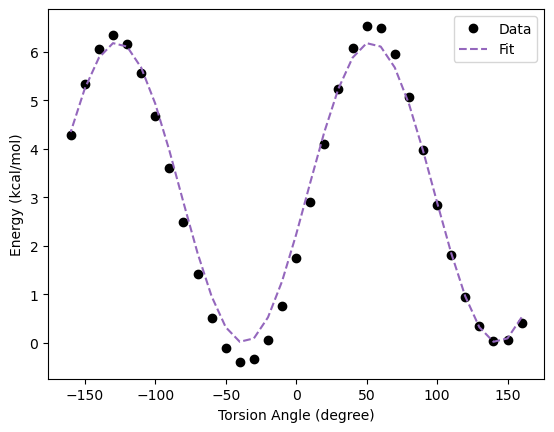

In [14]:
# fitting dihedral 5, (8,  6,  4,  3)

dinum = 5

def sum_vdihed(x, k1, d1):
    """function for all dihedrals at once"""
    ks = np.array([k1])
    ds = np.array([d1])
    
    vdiheds = np.zeros((1, len(x)))
    
    for i, n in enumerate([2]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],
                     )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=2 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()

For the torsion angle between atoms  (7, 6, 4, 2)
the n=2 force constant is  3.0735323424800405 ± 0.04189162808745851 kcal/mol
and the phase shift is  -138.9140238356158 ± 1.4011042957770852 degrees


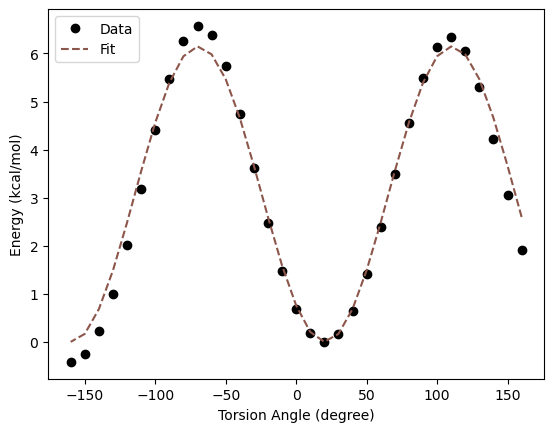

In [15]:
# fitting dihedral 6, (7, 6, 4, 2)

dinum = 6

def sum_vdihed(x, k1, d1):
    """function for all dihedrals at once"""
    ks = np.array([k1])
    ds = np.array([d1])
    
    vdiheds = np.zeros((1, len(x)))
    
    for i, n in enumerate([2]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],

                     )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=2 force constant is ', str(parms[0][0]),'\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()


For the torsion angle between atoms  (7, 6, 4, 3)
the n=2 force constant is  3.127386841639184 ± 0.03723811416728878 kcal/mol
and the phase shift is  -104.91948150326989 ± 1.2545329615314371 degrees


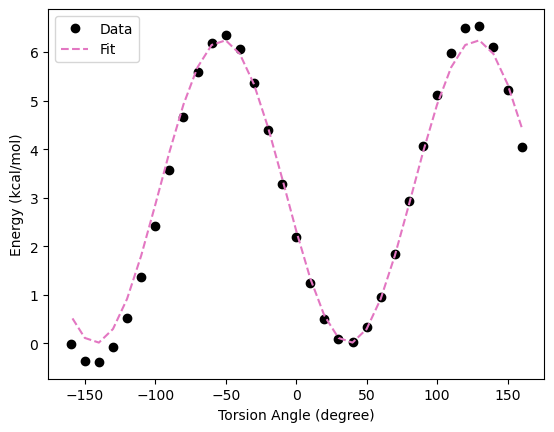

In [16]:
# fitting dihedral 7, (7, 6, 4, 3)

dinum = 7

def sum_vdihed(x, k1, d1):
    """function for all dihedrals at once"""
    ks = np.array([k1])
    ds = np.array([d1])
    
    vdiheds = np.zeros((1, len(x)))
    
    for i, n in enumerate([2]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],
                      bounds=([0, -180],
                              [np.inf, 180])#, 
                      #p0=p0[i]
                     )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=2 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()


For the torsion angle between atoms  (6, 4, 3, 2)
the n=1 force constant is  53.93033167014626 ± 0.7868613871921181 kcal/mol
and the phase shift is  -75.49476779466738 ± 0.3807864280169762 degrees
the n=3 force constant is  2.818085944351312 ± 0.1704370899837162 kcalmol
and the phase shift is  170.00087350984975 ± 6.802698020655268 degrees


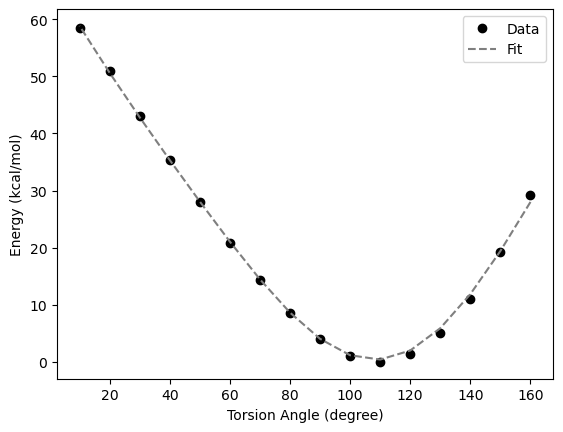

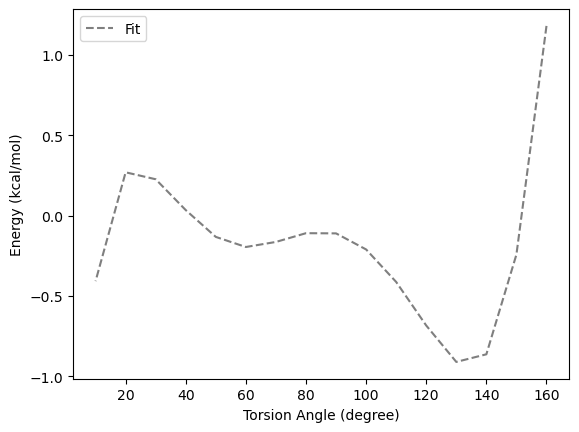

In [17]:
# fitting dihedral 8, (6, 4, 3, 2)

dinum = 8

def sum_vdihed(x, k1, d1, k2, d2):
    """function for all dihedrals at once"""
    ks = np.array([k1, k2])
    ds = np.array([d1, d2])
    
    vdiheds = np.zeros((2, len(x)))
    
    for i, n in enumerate([1, 3]):
        vdiheds[i] = vdihed(x, n, ks[i], ds[i])
    
    return np.sum(vdiheds, axis=0)

parms = spo.curve_fit(sum_vdihed, 
                      data[dinum-1][:, 0], 
                      data[dinum-1][:, 1],
                      bounds=([0, -180, 0, -180],
                              [np.inf, 180, np.inf, 180])#, 
                      #p0=p0[i]
                     )

print('For the torsion angle between atoms ', str(coords[dinum-1]))
print('the n=1 force constant is ', str(parms[0][0]), '\u00B1', np.sqrt(np.diag(parms[1]))[0], 'kcal/mol')
print('and the phase shift is ', str(parms[0][1]), '\u00B1', np.sqrt(np.diag(parms[1]))[1], 'degrees')
print('the n=3 force constant is ', str(parms[0][2]), '\u00B1', np.sqrt(np.diag(parms[1]))[2], 'kcalmol')
print('and the phase shift is ', str(parms[0][3]), '\u00B1', np.sqrt(np.diag(parms[1]))[3], 'degrees')

plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1], 
             'o', 
             color='k', 
             label='Data') 
plt.plot(data[dinum-1][:, 0], 
         sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()


plt.plot(data[dinum-1][:, 0], 
         data[dinum-1][:, 1]-sum_vdihed(data[dinum-1][:, 0], *parms[0]), 
             '--', 
             color=colors[dinum-1],
        label='Fit')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Torsion Angle (degree)')
plt.legend()
plt.show()